## Data Cleaning and Processing

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('TechChallenge_Data.csv')

# Remove duplicate rows
df = df.drop_duplicates()

# Clean text columns - remove whitespace
text_columns = ['Month', 'AustralianPort', 'ForeignPort', 'Country']
for col in text_columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

# Handle missing values in numeric columns - replace with 0
numeric_columns = ['Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 
                  'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)',
                  'Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)']

for col in numeric_columns:
    df[col] = df[col].fillna(0)

# Remove any negative values - set to 0
for col in numeric_columns:
    df.loc[df[col] < 0, col] = 0

# Recalculate totals to ensure consistency
df['Passengers_Total'] = df['Passengers_In'] + df['Passengers_Out']
df['Freight_Total_(tonnes)'] = df['Freight_In_(tonnes)'] + df['Freight_Out_(tonnes)']
df['Mail_Total_(tonnes)'] = df['Mail_In_(tonnes)'] + df['Mail_Out_(tonnes)']

# Standardize location names to title case
df['AustralianPort'] = df['AustralianPort'].str.title()
df['ForeignPort'] = df['ForeignPort'].str.title()
df['Country'] = df['Country'].str.title()

# Fix common country abbreviations
country_mappings = {
    'Usa': 'USA',
    'Uk': 'UK',
    'Uae': 'UAE',
    'United Arab Emirates': 'UAE'
}
for old, new in country_mappings.items():
    df['Country'] = df['Country'].str.replace(old, new, case=False)

# Create additional useful columns
df['Date'] = pd.to_datetime(df['Month'], format='%b-%y')
df['Route'] = df['AustralianPort'] + ' - ' + df['ForeignPort']

# Sort data chronologically
df = df.sort_values(['Year', 'Month_num', 'AustralianPort', 'ForeignPort'])

# Save cleaned data
df.to_csv('cleaned_flight_data.csv', index=False)

# Display basic info about cleaned data
print(f"Cleaned data shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

Cleaned data shape: (9999, 17)
Date range: 1985-01-01 00:00:00 to 1989-07-01 00:00:00


## Question 1a - Most Flown Routes

In [3]:
import pandas as pd

# Read the cleaned data
df = pd.read_csv('cleaned_flight_data.csv')

# Group by route and sum total passengers
route_traffic = df.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=False)

# Get most trafficked routes (top 5)
print("MOST TRAFFICKED ROUTES:")
print("-" * 50)
for route, passengers in route_traffic.head().items():
    print(f"{route}: {passengers:,} passengers")

# Get least trafficked routes (bottom 5)
print("\n\nLEAST TRAFFICKED ROUTES:")
print("-" * 50)
for route, passengers in route_traffic.tail().items():
    print(f"{route}: {passengers:,} passengers")

# Show the single most and least trafficked
print(f"\n\nMost trafficked: {route_traffic.index[0]} ({route_traffic.iloc[0]:,} passengers)")
print(f"Least trafficked: {route_traffic.index[-1]} ({route_traffic.iloc[-1]:,} passengers)")

MOST TRAFFICKED ROUTES:
--------------------------------------------------
Sydney - Auckland: 2,961,212 passengers
Sydney - Singapore: 1,440,018 passengers
Sydney - Tokyo: 1,292,116 passengers
Sydney - Hong Kong: 1,151,900 passengers
Perth - Singapore: 952,926 passengers


LEAST TRAFFICKED ROUTES:
--------------------------------------------------
Melbourne - Denver: 0 passengers
Perth - Bandar Seri Begawan: 0 passengers
Brisbane - Colombo: 0 passengers
Adelaide - Harare: 0 passengers
Brisbane - Chicago: 0 passengers


Most trafficked: Sydney - Auckland (2,961,212 passengers)
Least trafficked: Brisbane - Chicago (0 passengers)


## Question 1b & 1c - Trends and Geographical Patterns + Visualizations

YEARLY PASSENGER TRENDS
--------------------------------------------------
1985: 5,200,373 passengers
1986: 5,818,437 passengers
1987: 6,714,432 passengers
1988: 7,766,782 passengers
1989: 3,795,339 passengers


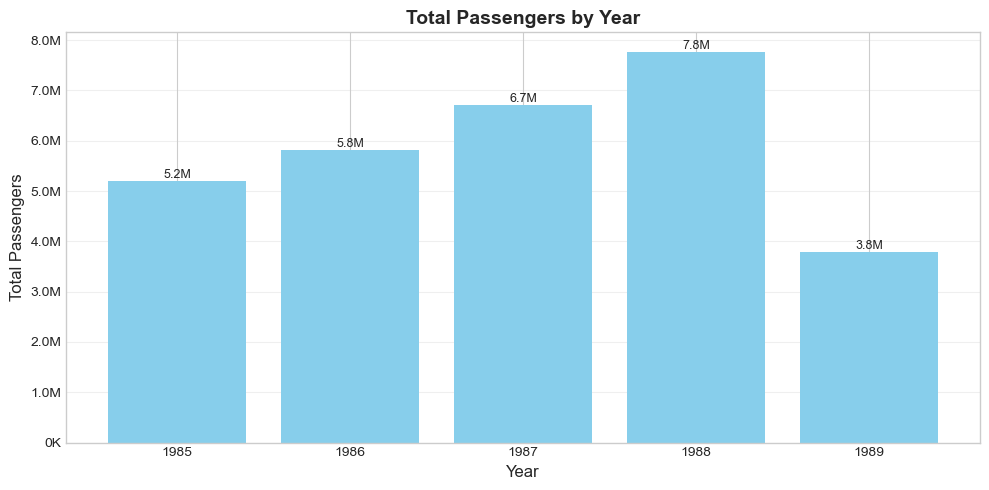



TOP 10 COUNTRIES BY PASSENGER TRAFFIC
--------------------------------------------------
New Zealand: 7,881,613 passengers
Singapore: 4,130,761 passengers
USA: 3,084,101 passengers
Hong Kong: 2,217,453 passengers
Japan: 1,773,146 passengers
UK: 1,729,405 passengers
Indonesia: 1,552,095 passengers
Fiji: 933,701 passengers
Thailand: 930,728 passengers
Malaysia: 835,317 passengers


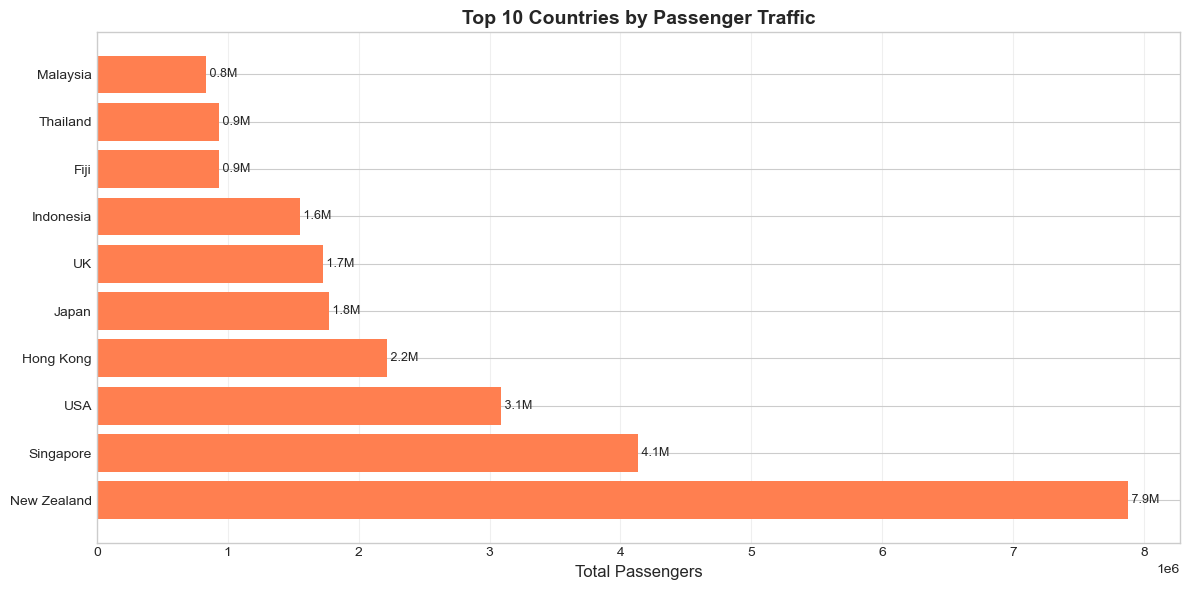



TRAFFIC BY AUSTRALIAN PORT
--------------------------------------------------
Sydney: 15,499,688 passengers
Melbourne: 6,180,004 passengers
Brisbane: 3,153,897 passengers
Perth: 2,811,590 passengers
Adelaide: 604,937 passengers
Cairns: 474,393 passengers
Darwin: 277,604 passengers
Townsville: 110,539 passengers
Norfolk Island: 91,120 passengers
Hobart: 70,312 passengers
Port Hedland: 21,279 passengers


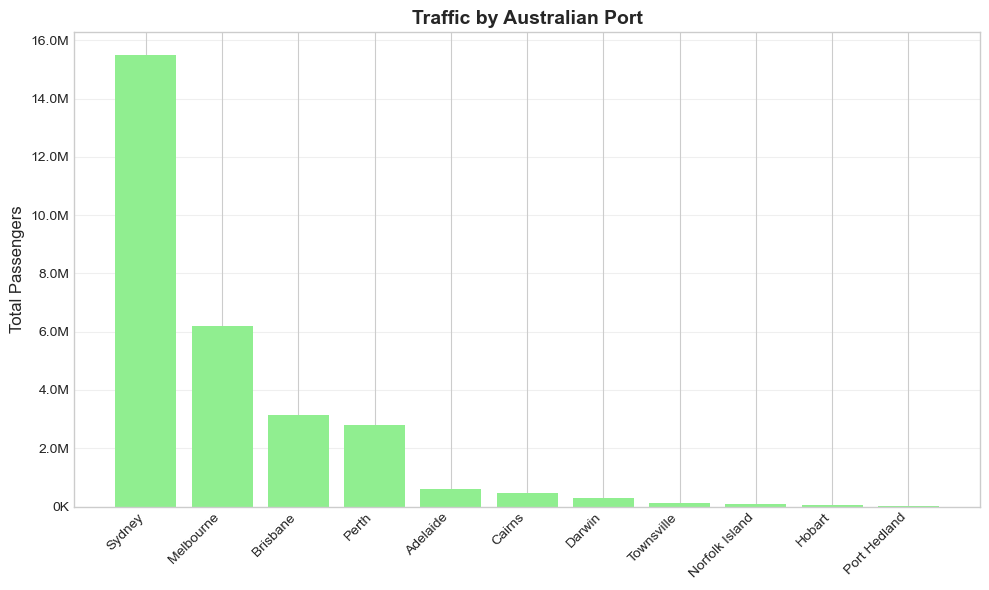



SEASONAL PATTERNS (AVERAGE BY MONTH)
--------------------------------------------------
Jan: 3,360 avg passengers
Feb: 2,699 avg passengers
Mar: 2,927 avg passengers
Apr: 2,764 avg passengers
May: 2,726 avg passengers
Jun: 2,709 avg passengers
Jul: 2,823 avg passengers
Aug: 3,048 avg passengers
Sep: 3,033 avg passengers
Oct: 2,982 avg passengers
Nov: 2,944 avg passengers
Dec: 3,237 avg passengers


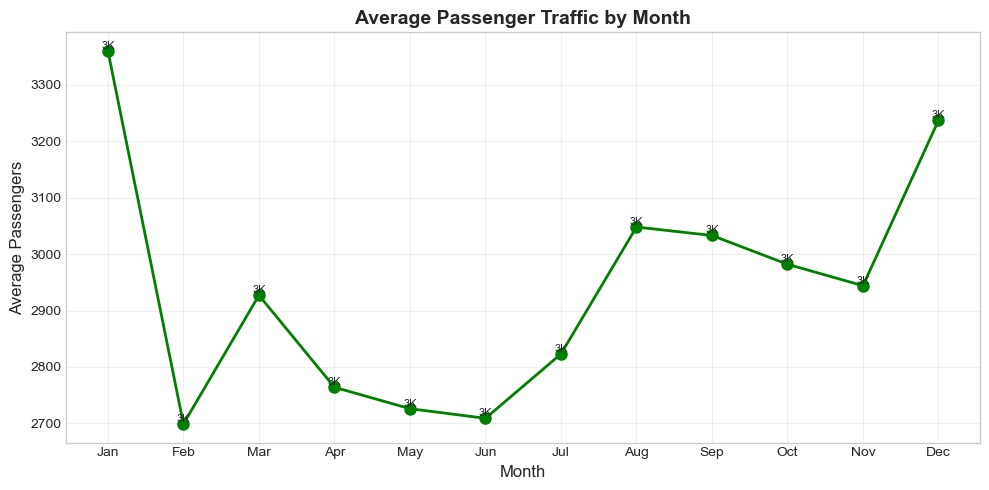



DIRECTIONAL TRAFFIC ANALYSIS
--------------------------------------------------
Total Inbound: 14,898,445 passengers
Total Outbound: 14,396,918 passengers
Net Flow: 501,527 (positive = more arrivals)


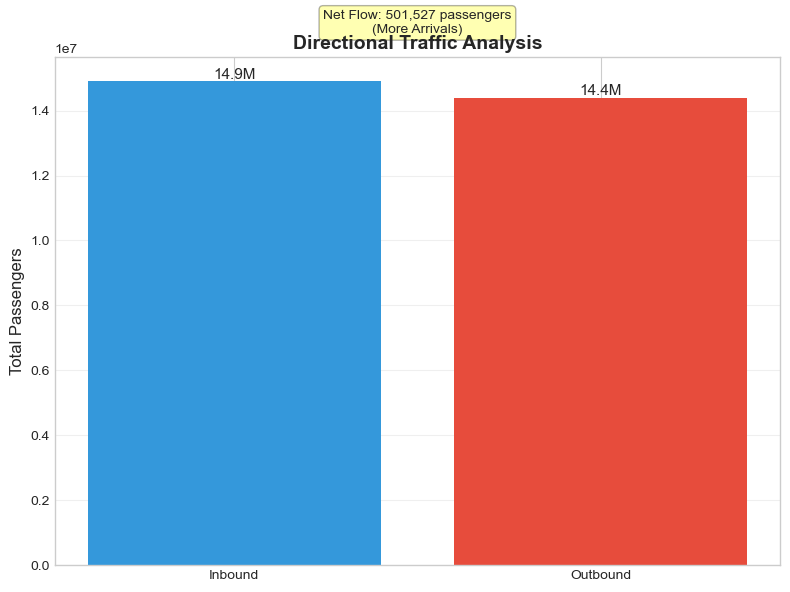

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the cleaned data
df = pd.read_csv('cleaned_flight_data.csv')

# Convert Date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# 1. YEARLY TRENDS
print("YEARLY PASSENGER TRENDS")
print("-" * 50)

# Group all rows by year and sum up the total passengers for each year
yearly_traffic = df.groupby('Year')['Passengers_Total'].sum()

# Print out each year and its passenger count with comma formatting
for year, passengers in yearly_traffic.items():
    print(f"{year}: {passengers:,} passengers")

# Create the bar chart
plt.figure(figsize=(10, 5))  # Create a figure 10 inches wide, 5 inches tall
# Convert years to strings for x-axis labels
years = yearly_traffic.index.astype(str)
# Get the actual passenger count values
passenger_counts = yearly_traffic.values  

# Create bar chart with explicit x and y values
plt.bar(range(len(years)), passenger_counts, color='skyblue')

# Set the x-axis labels to be the years
plt.xticks(range(len(years)), years, rotation=0)

# Format the y-axis to show values in millions for readability
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

plt.title('Total Passengers by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Passengers', fontsize=12)

# Add value labels on top of each bar
for i, (year, count) in enumerate(zip(years, passenger_counts)):
    plt.text(i, count, f'{count/1e6:.1f}M', ha='center', va='bottom', fontsize=9)
# Add horizontal grid lines for easier reading
plt.grid(axis='y', alpha=0.3)
# Adjust layout to prevent label cutoff
plt.tight_layout()  
plt.show()

# 2. GEOGRAPHICAL PATTERNS - BY COUNTRY
print("\n\nTOP 10 COUNTRIES BY PASSENGER TRAFFIC")
print("-" * 50)

# Group by country, sum passengers, sort from highest to lowest
country_traffic = df.groupby('Country')['Passengers_Total'].sum().sort_values(ascending=False)

# Show only top 10 countries
for country, passengers in country_traffic.head(10).items():
    print(f"{country}: {passengers:,} passengers")

# Visualize top 10 countries
plt.figure(figsize=(12, 6))
top_countries = country_traffic.head(10)
plt.barh(range(len(top_countries)), top_countries.values, color='coral')
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Total Passengers', fontsize=12)
plt.title('Top 10 Countries by Passenger Traffic', fontsize=14, fontweight='bold')

# Add value labels
for i, (country, count) in enumerate(top_countries.items()):
    plt.text(count, i, f' {count/1e6:.1f}M', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. AUSTRALIAN PORTS ANALYSIS
print("\n\nTRAFFIC BY AUSTRALIAN PORT")
print("-" * 50)

# Group by Australian port and sum passengers
port_traffic = df.groupby('AustralianPort')['Passengers_Total'].sum().sort_values(ascending=False)

for port, passengers in port_traffic.items():
    print(f"{port}: {passengers:,} passengers")

# Visualize port traffic
plt.figure(figsize=(10, 6))
plt.bar(range(len(port_traffic)), port_traffic.values, color='lightgreen')
plt.xticks(range(len(port_traffic)), port_traffic.index, rotation=45, ha='right')
plt.ylabel('Total Passengers', fontsize=12)
plt.title('Traffic by Australian Port', fontsize=14, fontweight='bold')

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. SEASONAL PATTERNS
print("\n\nSEASONAL PATTERNS (AVERAGE BY MONTH)")
print("-" * 50)

# Calculate average passengers per month across all years
monthly_avg = df.groupby('Month_num')['Passengers_Total'].mean().round()

# Month names for display
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month_num, avg_passengers in monthly_avg.items():
    print(f"{months[month_num-1]}: {avg_passengers:,.0f} avg passengers")

# Plot seasonal pattern
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='green', linewidth=2, markersize=8)
plt.title('Average Passenger Traffic by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Passengers', fontsize=12)
plt.xticks(range(1, 13), months)

# Add value labels
for month, avg in monthly_avg.items():
    plt.text(month, avg, f'{avg/1e3:.0f}K', ha='center', va='bottom', fontsize=8)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. DIRECTIONAL ANALYSIS
print("\n\nDIRECTIONAL TRAFFIC ANALYSIS")
print("-" * 50)

# Sum all inbound and outbound passengers
total_in = df['Passengers_In'].sum()
total_out = df['Passengers_Out'].sum()

print(f"Total Inbound: {total_in:,} passengers")
print(f"Total Outbound: {total_out:,} passengers")
print(f"Net Flow: {total_in - total_out:,} (positive = more arrivals)")

# Visualize directional flow
plt.figure(figsize=(8, 6))
directions = ['Inbound', 'Outbound']
passenger_counts = [total_in, total_out]
colors = ['#3498db', '#e74c3c']

bars = plt.bar(directions, passenger_counts, color=colors)
plt.ylabel('Total Passengers', fontsize=12)
plt.title('Directional Traffic Analysis', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, count in zip(bars, passenger_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count/1e6:.1f}M', ha='center', va='bottom', fontsize=11)

# Add net flow annotation
net_flow = total_in - total_out
plt.text(0.5, max(passenger_counts) * 1.1, 
         f'Net Flow: {net_flow:,} passengers\n{"(More Arrivals)" if net_flow > 0 else "(More Departures)"}',
         ha='center', transform=plt.gca().transData, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.3))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Question 2 - Prediction Model

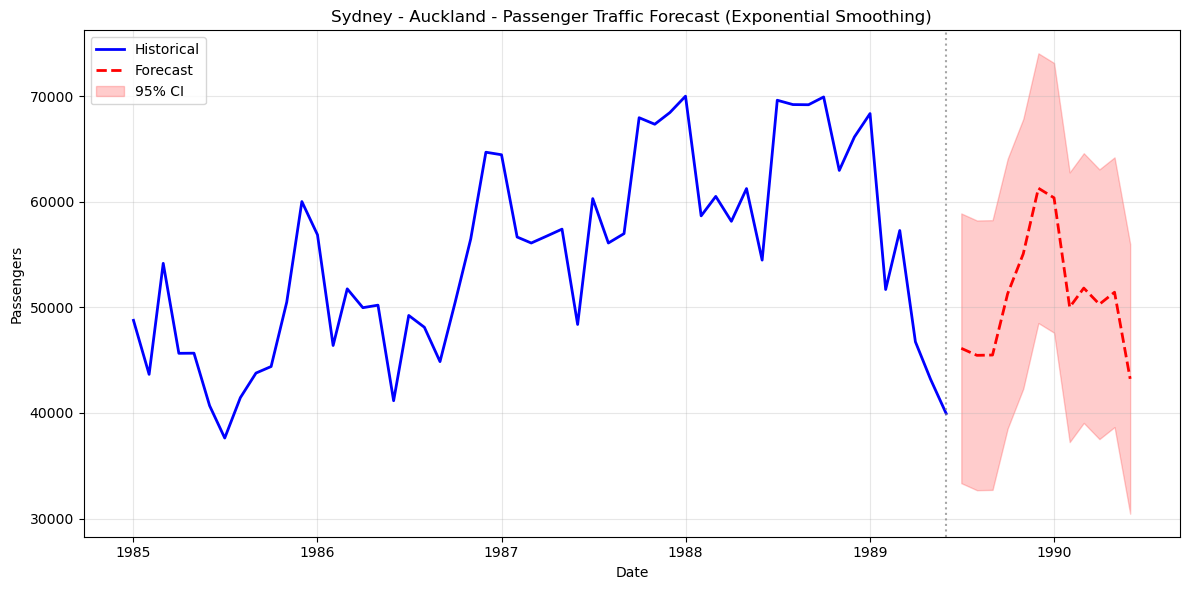


Predictions for Sydney - Auckland:
Jul 1989: 46,127
Aug 1989: 45,462
Sep 1989: 45,491
Oct 1989: 51,304
Nov 1989: 55,085
Dec 1989: 61,295
Jan 1990: 60,384
Feb 1990: 50,019
Mar 1990: 51,834
Apr 1990: 50,301
May 1990: 51,441
Jun 1990: 43,235


In [2]:
#!/usr/bin/env python3
"""
Flight Traffic Prediction Model
Predicts passenger traffic for the next 6-12 months using historical flight data.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
df = pd.read_csv('cleaned_flight_data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')

# Select route with highest traffic
selectedRoute = df.groupby('Route')['Passengers_Total'].sum().idxmax()
routeData = df[df['Route'] == selectedRoute].set_index('Date')

# Create time series
passengerSeries = routeData['Passengers_Total'].reindex(
    pd.date_range(routeData.index.min(), routeData.index.max(), freq='MS')
).interpolate(method='linear')

# Train-test split (last 6 months for testing)
testMonths = 6
trainData = passengerSeries[:-testMonths]
testData = passengerSeries[-testMonths:]

# Build and evaluate models
models = {}
errors = {}

# Exponential Smoothing
try:
    expModel = ExponentialSmoothing(trainData, trend='add', seasonal='add', seasonal_periods=12)
    expFit = expModel.fit(optimized=True)
    expPred = expFit.forecast(steps=testMonths)
    errors['Exponential Smoothing'] = mean_absolute_error(testData, expPred)
    models['Exponential Smoothing'] = (ExponentialSmoothing, {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12})
except:
    pass

# SARIMA
try:
    sarimaModel = SARIMAX(trainData, order=(1,1,1), seasonal_order=(1,1,1,12))
    sarimaFit = sarimaModel.fit(disp=False)
    sarimaPred = sarimaFit.forecast(steps=testMonths)
    errors['SARIMA'] = mean_absolute_error(testData, sarimaPred)
    models['SARIMA'] = (SARIMAX, {'order': (1,1,1), 'seasonal_order': (1,1,1,12)})
except:
    pass

# Select best model and retrain on full data
bestModelName = min(errors, key=errors.get)
bestModelClass, bestParams = models[bestModelName]
finalModel = bestModelClass(passengerSeries, **bestParams)
finalFit = finalModel.fit(disp=False) if bestModelName == 'SARIMA' else finalModel.fit(optimized=True)

# Generate 12-month forecast
forecastMonths = 12
futureDates = pd.date_range(passengerSeries.index[-1] + pd.DateOffset(months=1), periods=forecastMonths, freq='MS')
predictions = finalFit.forecast(steps=forecastMonths)

# Create forecast dataframe with confidence intervals
forecastDf = pd.DataFrame({
    'Date': futureDates,
    'Predicted_Passengers': predictions.values,
    'Lower_Bound': np.maximum(0, predictions.values - errors[bestModelName] * 1.96),
    'Upper_Bound': predictions.values + errors[bestModelName] * 1.96
})

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(passengerSeries.index, passengerSeries.values, 'b-', linewidth=2, label='Historical')
plt.plot(forecastDf['Date'], forecastDf['Predicted_Passengers'], 'r--', linewidth=2, label='Forecast')
plt.fill_between(forecastDf['Date'], forecastDf['Lower_Bound'], forecastDf['Upper_Bound'], 
                 color='red', alpha=0.2, label='95% CI')
plt.axvline(x=passengerSeries.index[-1], color='gray', linestyle=':', alpha=0.7)
plt.title(f'{selectedRoute} - Passenger Traffic Forecast ({bestModelName})')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display predictions
print(f"\nPredictions for {selectedRoute}:")
for _, row in forecastDf.iterrows():
    print(f"{row['Date'].strftime('%b %Y')}: {row['Predicted_Passengers']:,.0f}")

# Save results
forecastDf.to_csv(f"{selectedRoute.replace(' - ', '_')}_forecast.csv", index=False)